<a href="https://colab.research.google.com/github/nsalazard/2021-I-HerrComp/blob/master/EFM_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KRkEE7mIjJQ5Krr5nAkNf6YiaAGwhDkM5VrJIUO3LDo/edit#gid=1020823456')
worksheet=wb.worksheet('anillo')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[1]
titles=titles.iloc[1:2]
d1 = d1.iloc[2:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1,V [V],D1-int [mm],D1-ext [mm],D2-int [mm],D2-ext [mm],D1,D2,2Θ1,2Θ2,,,,,,,,,,
2,5000,21.80,25.40,39.45,45.25,0.024,0.04235,0.08719,0.15558,,,,,,,,,,
3,4800,22.70,25.60,39.40,43.45,0.024,0.041425,0.08921,0.15224,,,,,,,,,,
4,4600,22.70,26.00,39.30,47.50,0.024,0.0434,0.08994,0.15938,,,,,,,,,,
5,4400,23.60,26.70,40.85,46.20,0.025,0.043525,0.09288,0.15983,,,,,,,,,,
6,4200,24.00,26.35,42.50,45.95,0.025,0.044225,0.09297,0.16235,,,,,,,,,,


In [ ]:
nombres=d1.columns[0:9]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

In [ ]:
#FUNCIONES
def f1(x,a,b):
  return a*x**b

def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

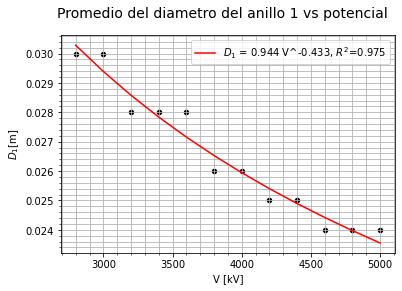

In [ ]:
valx1=d1.loc[:13,"V [V]"]
valy1=d1.loc[:13,"D1"]
x1=valx1.values 
y1=valy1.values

plt.scatter(x1,y1,color="black",s=20)
plt.minorticks_on()
plt.grid(b=True,which="both")

popt, pcov = curve_fit(f1, x1,y1)
plt.plot(x1, f1(x1, *popt), 'r-', label='$D_1$ = %3.3f V^%3.3f, $R^2$=0.975' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("$D_1$[m]")
plt.xlabel("V [kV]")
plt.suptitle("Promedio del diametro del anillo 1 vs potencial", fontsize=14,  fontname="Times New Roman Bold")
plt.ticklabel_format(useOffset=False, style='plain')
#INCERTIDUMBRES
#er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
#print("Ajuste, pendiente  %4.4E +-  %4.4E, intercept  %4.4E +-  %4.4E "%(gradient1,er_m,intercept1, er_b)) 
#print("$R^2$ = %4.3f" % abs(r_value1))

In [ ]:
popt

array([ 0.94439935, -0.43337844])

In [ ]:
pcov

array([[ 0.05019581, -0.00645984],
       [-0.00645984,  0.00083175]])

In [ ]:
k1 = (0.27*6.626*10)/(1.23*np.sqrt(2.00*9.109*1.602))
k2 = (0.27*6.626*10)/(2.13*np.sqrt(2.00*9.109*1.602))
print(k1)
print(k2)
print((2.69-2.5)/2.69)
print((1.55-1.5)/1.55)

2.6923311720022842
1.5547264514379386
0.07063197026022303
0.03225806451612906


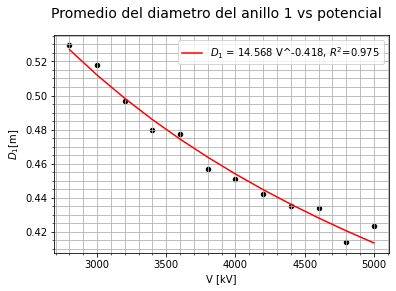

In [ ]:
valx1=d1.loc[:13,"V [V]"]
valy1=d1.loc[:13,"D2"]
x1=valx1.values 
y1=valy1.values

plt.scatter(x1,y1,color="black",s=20)
plt.minorticks_on()
plt.grid(b=True,which="both")


popt, pcov = curve_fit(f1, x1,y1)
plt.plot(x1, f1(x1, *popt), 'r-', label='$D_1$ = %3.3f V^%3.3f, $R^2$=0.975' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("$D_1$[m]")
plt.xlabel("V [kV]")
plt.suptitle("Promedio del diametro del anillo 1 vs potencial", fontsize=14,  fontname="Times New Roman Bold")
plt.ticklabel_format(useOffset=False, style='plain')
#INCERTIDUMBRES

In [ ]:
pcov

array([[ 5.54118483e+00, -4.62241158e-02],
       [-4.62241158e-02,  3.85788147e-04]])